In [2]:
import pandas as pd
df = pd.read_csv('jitensha.csv', encoding='cp932')
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,京成千葉中央駅前交番,121011,千葉県,千葉市中央区,新宿１丁目,2022-02-10,08,その他,駐車（輪）場,50歳代,その他,施錠せず
1,窃盗,自転車盗,千葉中央,京成千葉中央駅前交番,121011,千葉県,千葉市中央区,新宿１丁目,2022-03-22,20,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,その他,施錠した
2,窃盗,自転車盗,千葉中央,京成千葉中央駅前交番,121011,千葉県,千葉市中央区,新宿１丁目,2022-11-06,18,４階建て以上共同住宅,駐車（輪）場,30歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,京成千葉中央駅前交番,121011,千葉県,千葉市中央区,新宿２丁目,2022-03-01,21,４階建て以上共同住宅,駐車（輪）場,40歳代,その他,施錠した
4,窃盗,自転車盗,千葉中央,京成千葉中央駅前交番,121011,千葉県,千葉市中央区,新宿２丁目,2022-04-07,09,その他,その他,40歳代,その他,施錠した


# 市区町村ごとの発生件数

In [3]:
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        827
市川市        794
松戸市        562
柏市         471
千葉市中央区     468
浦安市        339
八千代市       320
習志野市       313
千葉市美浜区     267
千葉市稲毛区     250
市原市        244
流山市        199
木更津市       196
野田市        193
千葉市若葉区     192
成田市        172
千葉市花見川区    167
四街道市       139
鎌ケ谷市       114
印西市        107
千葉市緑区      106
我孫子市       103
佐倉市         92
白井市         87
東金市         74
八街市         73
君津市         64
旭市          53
茂原市         49
富津市         45
袖ケ浦市        32
富里市         29
酒々井町        27
館山市         22
銚子市         21
栄町          20
香取市         20
山武市         15
鴨川市         14
大網白里市       10
いすみ市         9
匝瑳市          9
横芝光町         9
一宮町          6
長生村          5
芝山町          4
南房総市         4
御宿町          4
多古町          3
勝浦市          1
東庄町          1
神崎町          1
dtype: int64

# 各時間帯

【件数順】


,件数,割合(%)
発生時（始期）,,
18,667,9.08
07,653,8.89
17,609,8.29
16,503,6.85
08,502,6.83
19,422,5.74
12,380,5.17
15,361,4.91
20,356,4.85


【時間の流れ順】


,件数,割合(%)
発生時（始期）,,
00,88,1.20
01,35,0.48
02,25,0.34
03,15,0.20
04,21,0.29
05,86,1.17
06,208,2.83
07,653,8.89
08,502,6.83


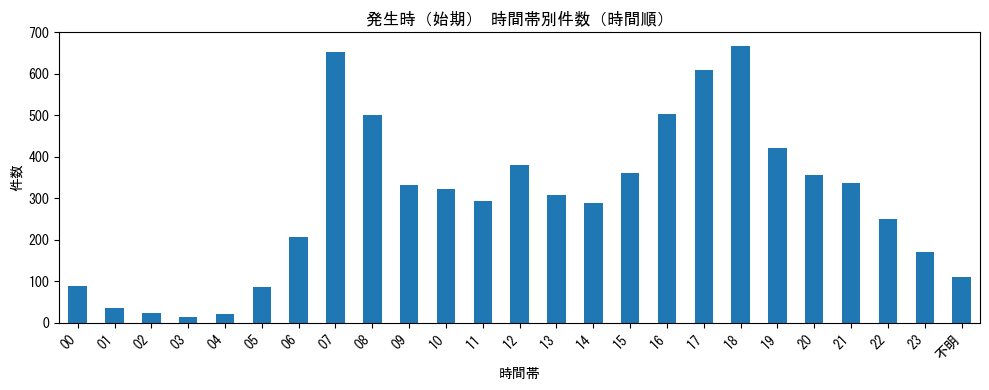

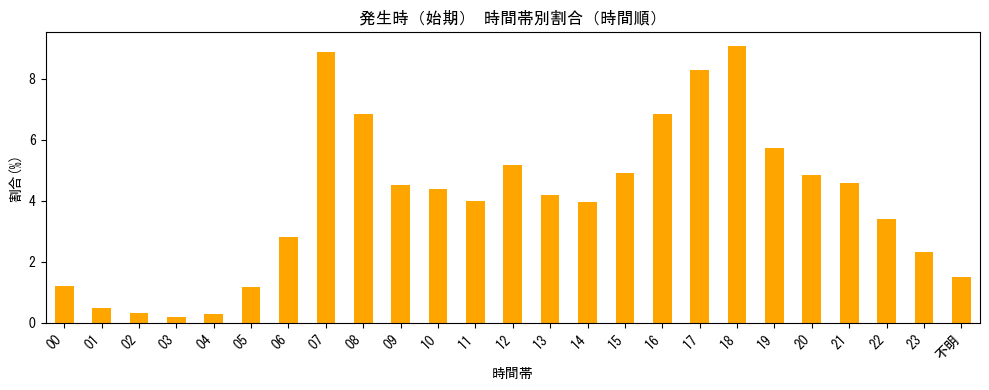

In [5]:
# 時間帯の件数と割合
import re
import matplotlib as mpl

mpl.rcParams['font.family'] = ['MS Gothic']
mpl.rcParams['axes.unicode_minus'] = False  # keeps minus signs visible
series = df['発生時（始期）']
counts = series.value_counts(dropna=False)
percent = (counts / len(series) * 100).round(2)
summary = pd.DataFrame({'件数': counts, '割合(%)': percent})
# 時間の数字が含まれていれば抽出して並び替え（なければ後ろに）
def extract_hour(s):
    m = re.search(r'(\d{1,2})', str(s))
    return int(m.group(1)) if m else 999
summary['開始時刻(推定)'] = summary.index.map(extract_hour)
chronological = summary.sort_values(['開始時刻(推定)', '件数'])
summary_sorted = summary.sort_values('件数', ascending=False).drop(columns='開始時刻(推定)')
chronological = chronological.drop(columns='開始時刻(推定)')
print('【件数順】')
display(summary_sorted)
print('【時間の流れ順】')
display(chronological)

# 棒グラフ（時間順）
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
chronological['件数'].plot(kind='bar')
plt.title('発生時（始期） 時間帯別件数（時間順）')
plt.ylabel('件数')
plt.xlabel('時間帯')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
chronological['割合(%)'].plot(kind='bar', color='orange')
plt.title('発生時（始期） 時間帯別割合（時間順）')
plt.ylabel('割合(%)')
plt.xlabel('時間帯')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

分析：このデータから、盗難の発生は18~19時前後と朝7~8時台に集中していることが分かった。対照的に深夜帯は極端に少なく、また時間帯が不明の件数が一定数存在している。
　主な傾向
高頻度ピーク：18時(9.08%)　帰宅集中時間
通勤・通学開始：7~9時で　1,488件 (20%)おそらく朝の出勤や登校後の一時駐輪が多い可能性
昼休み付近：11~13時　981件 (13%)　昼食・短時間外出時の施錠甘さや人流の増加。
緩やかな減少: 20～22時で 943件 (約13%)。夜間でも人の往来が残る時間。
深夜の頻度： 0~5時　255件 (約3.5%)

# 鍵の施錠の有無

In [13]:
# 施錠関係の件数と割合
counts = df['施錠関係'].value_counts(dropna=False)
proportions = df['施錠関係'].value_counts(normalize=True, dropna=False)
result = (
    pd.DataFrame({'件数': counts, '割合': proportions})
      .assign(割合=lambda x: (x['割合'] * 100).round(2))
      .sort_values('件数', ascending=False)
)
# 表示（割合は0-1、割合_パーセントは%表示）
result

,件数,割合
施錠関係,,
施錠せず,4713,64.16
施錠した,2633,35.84


# 被害者の特徴

In [14]:
# 被害者の特徴（年齢・職業など）
import re

cols = list(df.columns)
print('列名:', cols)

age_col = next((c for c in cols if '年齢' in c or '歳' in c), None)
occupation_col = next((c for c in cols if '職業' in c), None)

occ_raw = None
occ_df = pd.DataFrame()
if occupation_col:
    occ_raw = (
        df[occupation_col]
        .astype(str)
        .str.strip()
        .replace({'': '不明', 'nan': '不明', 'None': '不明'})
    )
    occ_counts = occ_raw.value_counts(dropna=False)
    occ_percent = (occ_counts / len(occ_raw) * 100).round(2)
    occ_df = pd.DataFrame({'件数': occ_counts, '割合(%)': occ_percent}).sort_values('件数', ascending=False)

if age_col is None:
    print('年齢関連列が見つかりませんでした。列名に「年齢」または「歳」を含む列が必要です。')
else:
    age_raw = df[age_col].astype(str).str.strip()
    # カテゴリ化（既に「50歳代」などならそのまま使う）
    # 数値のみの場合は10歳刻みでビン分け
    def normalize_age_category(s):
        if s in ['', 'nan', 'None']:
            return '不明'
        if '歳' in s:  # "50歳代" など
            return s
        m = re.fullmatch(r'(\d{1,3})', s)
        if m:
            n = int(m.group(1))
            bucket = f"{(n//10)*10}歳代" if n < 100 else '100歳以上'
            return bucket
        m2 = re.search(r'(\d{1,3})', s)
        if m2:
            n = int(m2.group(1))
            bucket = f"{(n//10)*10}歳代" if n < 100 else '100歳以上'
            return bucket
        return s

    age_cat = age_raw.map(normalize_age_category)
    age_counts = age_cat.value_counts(dropna=False)
    age_percent = (age_counts / len(age_cat) * 100).round(2)
    age_df = (
        pd.DataFrame({'件数': age_counts, '割合(%)': age_percent})
          .sort_values('件数', ascending=False)
    )
    print('\n【年齢カテゴリ 件数順】')
    display(age_df)

    # 時系列順（10歳刻みで並べ替えを試みる）
    def age_order_key(s):
        m = re.search(r'(\d{1,3})', s)
        return int(m.group(1)) if m else 999
    age_df_chrono = age_df.assign(_key=age_df.index.map(age_order_key)).sort_values('_key').drop(columns='_key')
    print('\n【年齢カテゴリ 年齢順】')
    display(age_df_chrono)

    

    # 年齢×職業 クロス集計（上位職業のみ）
    if occupation_col and not occ_df.empty:
        top_occ = occ_df.head(10).index
        occ_for_ctab = occ_raw.where(occ_raw.isin(top_occ), 'その他')
        age_occ_ctab = pd.crosstab(age_cat, occ_for_ctab)
        age_occ_ctab_pct = (age_occ_ctab / age_occ_ctab.sum().sum() * 100).round(2)
        print('\n【年齢×職業（上位10職業＋その他）件数】')
        display(age_occ_ctab)
        print('\n【年齢×職業 割合(%)】')
        display(age_occ_ctab_pct)
    elif occupation_col:
        print('職業データはありますが、分類できる件数がありませんでした。')
    else:
        print('職業関連列が見つかりませんでした。')

列名: ['罪名', '手口', '管轄警察署（発生地）', '管轄交番・駐在所（発生地）', '市区町村コード（発生地）', '都道府県（発生地）', '市区町村（発生地）', '町丁目（発生地）', '発生年月日（始期）', '発生時（始期）', '発生場所', '発生場所の詳細', '被害者の年齢', '被害者の職業', '施錠関係']

【年齢カテゴリ 件数順】


,件数,割合(%)
被害者の年齢,,
10歳代,3011,40.99
20歳代,1918,26.11
30歳代,771,10.50
40歳代,636,8.66
50歳代,423,5.76
70歳以上,282,3.84
60-64歳,106,1.44
65-69歳,103,1.40
10歳未満,67,0.91



【年齢カテゴリ 年齢順】


,件数,割合(%)
被害者の年齢,,
10歳代,3011,40.99
10歳未満,67,0.91
20歳代,1918,26.11
30歳代,771,10.50
40歳代,636,8.66
50歳代,423,5.76
60-64歳,106,1.44
65-69歳,103,1.40
70歳以上,282,3.84



【年齢×職業（上位10職業＋その他）件数】


被害者の職業,その他,中学生,大学生,小学生,法人・団体、被害者なし,高校生
被害者の年齢,,,,,,
10歳代,260,648,433,169,0,1501
10歳未満,0,0,0,67,0,0
20歳代,1344,0,574,0,0,0
30歳代,766,0,5,0,0,0
40歳代,636,0,0,0,0,0
50歳代,423,0,0,0,0,0
60-64歳,106,0,0,0,0,0
65-69歳,103,0,0,0,0,0
70歳以上,282,0,0,0,0,0



【年齢×職業 割合(%)】


被害者の職業,その他,中学生,大学生,小学生,法人・団体、被害者なし,高校生
被害者の年齢,,,,,,
10歳代,3.54,8.82,5.89,2.30,0.00,20.43
10歳未満,0.00,0.00,0.00,0.91,0.00,0.00
20歳代,18.30,0.00,7.81,0.00,0.00,0.00
30歳代,10.43,0.00,0.07,0.00,0.00,0.00
40歳代,8.66,0.00,0.00,0.00,0.00,0.00
50歳代,5.76,0.00,0.00,0.00,0.00,0.00
60-64歳,1.44,0.00,0.00,0.00,0.00,0.00
65-69歳,1.40,0.00,0.00,0.00,0.00,0.00
70歳以上,3.84,0.00,0.00,0.00,0.00,0.00


# 散布図の可視化

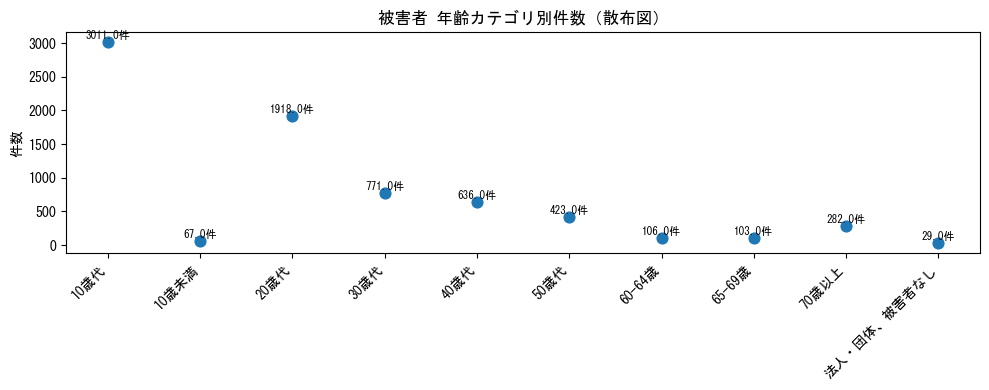

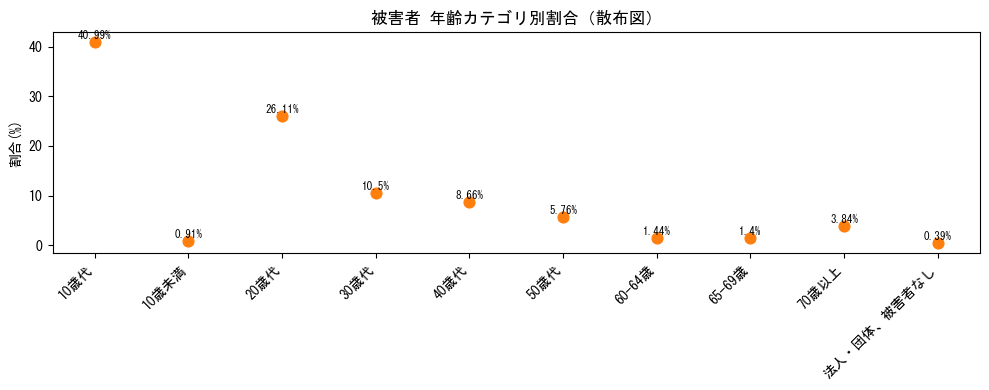

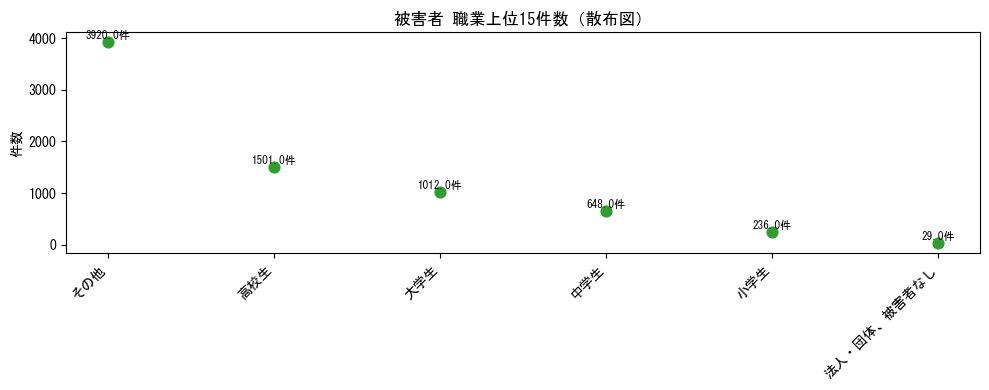

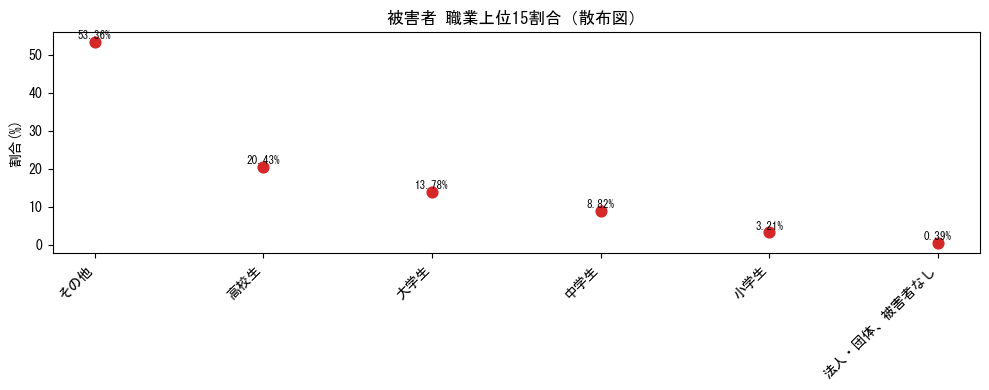

In [6]:
# 散布図による分布可視化（年齢・職業）
import re
import matplotlib.pyplot as plt
import pandas as pd

# 年齢カテゴリ再計算（前セル未実行でも動くよう再定義）
cols = list(df.columns)
age_col = next((c for c in cols if '年齢' in c or '歳' in c), None)
occupation_col = next((c for c in cols if '職業' in c), None)

def normalize_age_category(s):
    if s in ['', 'nan', 'None']:
        return '不明'
    if '歳' in s:
        return s
    m = re.fullmatch(r'(\d{1,3})', s)
    if m:
        n = int(m.group(1))
        return f"{(n//10)*10}歳代" if n < 100 else '100歳以上'
    m2 = re.search(r'(\d{1,3})', s)
    if m2:
        n = int(m2.group(1))
        return f"{(n//10)*10}歳代" if n < 100 else '100歳以上'
    return s

if age_col:
    age_raw = df[age_col].astype(str).str.strip()
    age_cat = age_raw.map(normalize_age_category)
    age_counts = age_cat.value_counts(dropna=False)
    age_percent = (age_counts / len(age_cat) * 100).round(2)
    age_df_chrono = (
        pd.DataFrame({'件数': age_counts, '割合(%)': age_percent})
        .assign(_key=lambda x: x.index.map(lambda s: int(re.search(r'(\d{1,3})', s).group(1)) if re.search(r'(\d{1,3})', s) else 999))
        .sort_values('_key').drop(columns='_key')
    )
else:
    age_df_chrono = pd.DataFrame()

if occupation_col:
    occ_raw = df[occupation_col].astype(str).str.strip().replace({'': '不明', 'nan': '不明'})
    occ_counts = occ_raw.value_counts(dropna=False)
    occ_percent = (occ_counts / len(occ_raw) * 100).round(2)
    occ_df = pd.DataFrame({'件数': occ_counts, '割合(%)': occ_percent}).sort_values('件数', ascending=False)
else:
    occ_df = pd.DataFrame()

# 年齢カテゴリ散布図
if not age_df_chrono.empty:
    x_positions = range(len(age_df_chrono))
    plt.figure(figsize=(10,4))
    plt.scatter(x_positions, age_df_chrono['件数'], s=60, color='tab:blue')
    for i,(cat,row) in enumerate(age_df_chrono.iterrows()):
        plt.text(i, row['件数']+ (max(age_df_chrono['件数'])*0.01), f"{row['件数']}件", ha='center', va='bottom', fontsize=8)
    plt.xticks(list(x_positions), age_df_chrono.index, rotation=45, ha='right')
    plt.title('被害者 年齢カテゴリ別件数（散布図）')
    plt.ylabel('件数')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.scatter(x_positions, age_df_chrono['割合(%)'], s=60, color='tab:orange')
    for i,(cat,row) in enumerate(age_df_chrono.iterrows()):
        plt.text(i, row['割合(%)']+ (max(age_df_chrono['割合(%)'])*0.01), f"{row['割合(%)']}%", ha='center', va='bottom', fontsize=8)
    plt.xticks(list(x_positions), age_df_chrono.index, rotation=45, ha='right')
    plt.title('被害者 年齢カテゴリ別割合（散布図）')
    plt.ylabel('割合(%)')
    plt.tight_layout()
    plt.show()
else:
    print('年齢カテゴリ散布図: 列なし')

# 職業上位散布図（上位15）
if not occ_df.empty:
    occ_top = occ_df.head(15)
    x_positions = range(len(occ_top))
    plt.figure(figsize=(10,4))
    plt.scatter(x_positions, occ_top['件数'], s=60, color='tab:green')
    for i,(cat,row) in enumerate(occ_top.iterrows()):
        plt.text(i, row['件数']+ (max(occ_top['件数'])*0.01), f"{row['件数']}件", ha='center', va='bottom', fontsize=8)
    plt.xticks(list(x_positions), occ_top.index, rotation=45, ha='right')
    plt.title('被害者 職業上位15件数（散布図）')
    plt.ylabel('件数')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.scatter(x_positions, occ_top['割合(%)'], s=60, color='tab:red')
    for i,(cat,row) in enumerate(occ_top.iterrows()):
        plt.text(i, row['割合(%)']+ (max(occ_top['割合(%)'])*0.01), f"{row['割合(%)']}%", ha='center', va='bottom', fontsize=8)
    plt.xticks(list(x_positions), occ_top.index, rotation=45, ha='right')
    plt.title('被害者 職業上位15割合（散布図）')
    plt.ylabel('割合(%)')
    plt.tight_layout()
    plt.show()
else:
    print('職業散布図: 列なし')

## 被害者特徴まとめ
- 年齢: 10歳代が約41%で突出。次いで20歳代が26%。30歳代以降は急減し高齢層は合計で10%未満。自転車利用頻度（通学・大学通学・アルバイト移動）が高い若年層に集中。
- 職業: 「高校生」「大学生」「中学生」「小学生」で学生層が約46%。その他が53%と大きく社会人詳細は不明。
- 年齢×職業: 10歳代は高校生中心＋中学生/大学生。20歳代は大学生＋その他。30歳代以降は学生が消えその他中心。
- 時間帯分析との整合: 朝(通学)と夕方(帰宅)ピーク → 学生・若年層集中を裏付け。
- 防犯示唆: 通学時間帯・キャンパス/学校周辺で多重ロック啓発・短時間施錠徹底。大学では講義間の“隙間時間”対策。
- データ品質: 職業「その他」が大きく社会人属性分類不足。正規表現で会社員/パート等抽出再分類の価値。

## 考察
　今回の自転車盗難データを見て、一番印象に残ったのは<span style="color: red;">若い世代</span>に偏っていることだった。10歳代と20歳代だけで全体のかなり大きな割合を占め、グラフの中でも強調されていた。朝と夕方のピークもその生活時間と重なっていて、通学・通勤の慌ただしさの中で施錠が甘くなっている様子が想像できる。深夜は件数が少なく、犯行は“人の動きが<span style="color: red;">"多い時間帯の隙”</span>をねらっているのだろうと思った。
　<br>
　施錠の状態を見ても、短時間だから大丈夫だろうという心理が背景にあるように感じる。実際にはその“短時間”が積み重なって多くの盗難を生んでいるのかもしれない。職業の列では「その他」が非常に多く、社会人の細かい内訳が分からず少しもったいない印象だった。もし会社員、パート、フリーターなどもう少し分かれていたら、年齢だけでなく生活パターン別の違いも見えたはず。
　<br>
　対策としては難しい技術よりも、まずはピークの時間帯に<span style="color: red;">確実にロックする習慣づけ</span>が大切だと感じた。学校や大学の入り口で“短くても必ず施錠”という標語を繰り返し見せたり、簡単な二重ロックの実演をするだけでも意識は変わりそうだ。駅周辺など人が多く自転車が密集する場所は、軽く触って動かせる未施錠車が見つかりやすいので、簡単な点検でも効果ありそうだ。さらに踏み込むと、職業の再分類や発生場所の詳細標準化などデータの整備がある。分析を続けるには情報の精度が重要で、この“その他”を減らせば、どの層にどんなメッセージが効いたかを後から評価しやすくと考える。
　<br>
　全体を通して、若年層の行動リズムと“ちょっとだけ置く”という油断が盗難の中心にある印象を強く持った。急いでいても一本余分に鍵をかける、その当たり前の行動を地道に増やしていくことが、派手さはなくても一番確かな改善につながると感じる。

# 盗難発生時点マップ

GitHubページリンク:https://github.com/CoderK-star/week8

In [ ]:
# 盗難発生地点マップ（市区町村レベルのジオコーディング）
# 前提: notebook 冒頭で df を読み込んでいる (cp932 / shift_jis)
# folium / geopy が未インストールなら自動インストール試行します。
import sys, subprocess, os, json, time

try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'folium'])
    import folium
    from folium.plugins import MarkerCluster

try:
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter
except ImportError:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'geopy'])
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter

# 安全に df をロード（存在しない場合のみ）
if 'df' not in globals():
    import pandas as pd
    df = pd.read_csv('jitensha.csv', encoding='cp932')

# 市区町村列名（既存セルで使用している名前に合わせる）
CITY_COL = '市区町村（発生地）'
if CITY_COL not in df.columns:
    raise ValueError(f'列 {CITY_COL} が見つかりません。列名を確認してください: {list(df.columns)[:10]} ...')

# ジオコーディングキャッシュ
CACHE_FILE = 'geocode_cache.json'
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, 'r', encoding='utf-8') as f:
        geocode_cache = json.load(f)
else:
    geocode_cache = {}

# 重複排除した市区町村
cities = sorted(df[CITY_COL].dropna().astype(str).str.strip().unique())

geolocator = Nominatim(user_agent='jitensha_map_app')
# レートリミッタ: 1秒間隔（Nominatim利用規約に配慮）
geocode_fn = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 既にキャッシュにあるものはスキップし、足りない分だけ問い合わせ
missing = [c for c in cities if c not in geocode_cache]
print(f'ジオコーディング未キャッシュ: {len(missing)} / {len(cities)} 件')

# 多すぎる場合は最初の 40件だけサンプル取得（必要なら増やす）
MAX_GEOCODE = 40
if len(missing) > MAX_GEOCODE:
    print(f'件数が多いため最初の {MAX_GEOCODE} 件のみジオコーディングします。')
    missing = missing[:MAX_GEOCODE]

for city in missing:
    try:
        # 日本内を優先するため country_codes='jp'
        loc = geocode_fn(city + ', Japan', country_codes='jp', timeout=10)
        if loc:
            geocode_cache[city] = {'lat': loc.latitude, 'lon': loc.longitude}
            print(f'OK: {city} -> ({loc.latitude:.4f}, {loc.longitude:.4f})')
        else:
            geocode_cache[city] = None
            print(f'NG: {city} 地理情報なし')
    except Exception as e:
        geocode_cache[city] = None
        print(f'ERR: {city} {e}')

# キャッシュ保存
with open(CACHE_FILE, 'w', encoding='utf-8') as f:
    json.dump(geocode_cache, f, ensure_ascii=False, indent=2)

# 集計: 市区町村ごとの件数
city_counts = df[CITY_COL].dropna().astype(str).str.strip().value_counts()
city_df = city_counts.rename('件数').reset_index().rename(columns={'index': CITY_COL})

# 緯度経度結合
city_df['lat'] = city_df[CITY_COL].map(lambda c: geocode_cache.get(c, {}).get('lat') if geocode_cache.get(c) else None)
city_df['lon'] = city_df[CITY_COL].map(lambda c: geocode_cache.get(c, {}).get('lon') if geocode_cache.get(c) else None)

mapped = city_df.dropna(subset=['lat','lon'])
if mapped.empty:
    print('有効な座標がまだありません。キャッシュや列名を確認してください。')
else:
    # 地図中心: 重心（平均）
    center_lat = mapped['lat'].mean()
    center_lon = mapped['lon'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='CartoDB positron')
    cluster = MarkerCluster().add_to(m)

    # 最大件数でサイズスケール
    max_count = mapped['件数'].max()

    for _, row in mapped.iterrows():
        c = row['件数']
        size = 6 + (24 * (c / max_count))  # Marker size scale
        popup_html = folium.Popup(
            f"<b>{row[CITY_COL]}</b><br>件数: {c}", max_width=250
        )
        # CircleMarkerで相対件数を視覚化
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=size,
            color='#2563eb',
            fill=True,
            fill_opacity=0.6,
            popup=popup_html
        ).add_to(cluster)

    # 件数テーブルを HTML に追加（簡易）
    table_html = (
        '<h4>市区町村別件数 (一部)</h4>' +
        mapped.sort_values('件数', ascending=False).head(20)
              .to_html(index=False)
    )
    folium.Marker(
        location=[center_lat, center_lon],
        icon=folium.DivIcon(html='<div style="font-size:12px;color:#111;background:rgba(255,255,255,0.8);padding:4px;border-radius:4px;">中心</div>')
    ).add_to(m)

    folium.LayerControl().add_to(m)

    # 地図保存
    out_html = 'jitensha_map.html'
    m.save(out_html)
    print(f'地図を {out_html} に保存しました。')
    m  # Notebook上で表示


ジオコーディング未キャッシュ: 0 / 52 件
